# Import Library

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import kendalltau
# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer


# Modeling
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,f1_score, accuracy_score, precision_score, recall_score,make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# Model Saving
import pickle
import warnings

warnings.filterwarnings('ignore')




# Load Data

In [2]:
df = pd.read_csv('credit_customers.csv')
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [3]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

Cleaning:
- Changed 'class' to 0 and 1
- Changed 'age','duration','installment_commitment','residence_since','existing_credits','num_dependents','class' to integers

In [5]:
df['class'].unique()

array(['good', 'bad'], dtype=object)

In [6]:
df['class'] = df['class'].replace('good', '1')
df['class'] = df['class'].replace('bad', '0')


In [7]:
to_integer = ['age','duration','installment_commitment','residence_since','existing_credits','num_dependents','class']
for i in to_integer:
    df[i] = df[i].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   int64  
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   int64  
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   int64  
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   int64  
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [9]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,1
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,1
996,<0,30,existing paid,used car,3857.0,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,1
997,no checking,12,existing paid,radio/tv,804.0,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,1
998,<0,45,existing paid,radio/tv,1845.0,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,0


In [10]:
df.columns


Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [11]:
columns = ['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class']

In [12]:
col_num = ['age','duration','credit_amount']
col_num

['age', 'duration', 'credit_amount']

In [13]:
col_cat = []
for i in columns :
    if i not in col_num:
        col_cat.append(i)

col_cat


['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'installment_commitment',
 'personal_status',
 'other_parties',
 'residence_since',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker',
 'class']

# Feature Selection 

In [14]:
correlation_num = []
for i in col_num:
    correlation, p_value = kendalltau(df['class'], df[i])


    if p_value <0.05 :
        correlation_num.append(i)
print('Column that has correlation with class column are', correlation_num)

Column that has correlation with class column are ['age', 'duration', 'credit_amount']


In [15]:
correlation_cat =[]
for i in col_cat :
    if i != 'class':
    
        corelation_table = pd.crosstab(df['class'], df[i])
        correlation_test = stats.chi2_contingency(corelation_table)
        pval = correlation_test.pvalue
    

        if pval < 0.05 :
            correlation_cat.append(i)
           

print('')
print('Column that has correlation with class column are', correlation_cat)





Column that has correlation with class column are ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'foreign_worker']


In [16]:
df_ready = pd.concat([df[correlation_num],df[correlation_cat],df['class']],axis=1)
df_ready

,age,duration,credit_amount,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,foreign_worker,class
0,67,6,1169.0,<0,critical/other existing credit,radio/tv,no known savings,>=7,male single,none,real estate,none,own,yes,1
1,22,48,5951.0,0<=X<200,existing paid,radio/tv,<100,1<=X<4,female div/dep/mar,none,real estate,none,own,yes,0
2,49,12,2096.0,no checking,critical/other existing credit,education,<100,4<=X<7,male single,none,real estate,none,own,yes,1
3,45,42,7882.0,<0,existing paid,furniture/equipment,<100,4<=X<7,male single,guarantor,life insurance,none,for free,yes,1
4,53,24,4870.0,<0,delayed previously,new car,<100,1<=X<4,male single,none,no known property,none,for free,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,12,1736.0,no checking,existing paid,furniture/equipment,<100,4<=X<7,female div/dep/mar,none,real estate,none,own,yes,1
996,40,30,3857.0,<0,existing paid,used car,<100,1<=X<4,male div/sep,none,life insurance,none,own,yes,1
997,38,12,804.0,no checking,existing paid,radio/tv,<100,>=7,male single,none,car,none,own,yes,1
998,23,45,1845.0,<0,existing paid,radio/tv,<100,1<=X<4,male single,none,no known property,none,for free,yes,0


In [17]:
# Separate targets from features

x = df_ready.drop('class',axis=1)
y = df_ready['class']

In [18]:
# Divide data into train data and test data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 66,stratify=y)

In [19]:
x_train_num = x_train[correlation_num]
x_train_cat = x_train[correlation_cat]

x_test_num = x_test[correlation_num]
x_test_cat = x_test[correlation_cat]

In [20]:
# Check the normality of the train data using skewness
normal_data_train = []
non_normal_data_train = []
for i in correlation_num :
    skew = x_train_num[i].skew()
    print('Skewness of', i ,'is', skew )
    if skew > 0.5 or skew <-0.5:
        non_normal_data_train.append(i)

    else :
        normal_data_train.append(i)

print('')
print('normal data :',normal_data_train)
print('non normal data : ',non_normal_data_train)

    



Skewness of age is 1.053614131550297
Skewness of duration is 1.0705270710917378
Skewness of credit_amount is 1.9905247625373703

normal data : []
non normal data :  ['age', 'duration', 'credit_amount']


In [21]:
# Check the normality of the test data using skewness
normal_data_test = []
non_normal_data_test = []
for i in correlation_num :
    skew = x_test_num[i].skew()
    print('Skewness of', i ,'is', skew )
    if skew > 0.5 or skew <-0.5:
        non_normal_data_test.append(i)

    else :
        normal_data_test.append(i)

print('')
print('normal data :',normal_data_test)
print('non normal data : ',non_normal_data_test)

    



Skewness of age is 0.9247514544737725
Skewness of duration is 1.1704853956469499
Skewness of credit_amount is 1.7361110995129663

normal data : []
non normal data :  ['age', 'duration', 'credit_amount']


In [22]:
# determination of outlier data in train data
for i in correlation_num:
    skew = x_train_num[i].skew()
    
    q1 = x_train_num[i].quantile(0.25)
    q3 = x_train_num[i].quantile(0.75)
    iqr = q3-q1

    upper_boundary = q3 + (1.5*iqr)
    lower_boundary = q1 - (1.5*iqr)

    outlier = x_train_num[(x_train_num[i]>upper_boundary)|((x_train_num[i]<lower_boundary))]
    persen_outlier = len(outlier)/len(x_train_num)*100

    print('Outlier of', i ,'is', persen_outlier, '%')






Outlier of age is 2.4 %
Outlier of duration is 6.933333333333333 %
Outlier of credit_amount is 6.533333333333332 %


In [23]:
# determination of outlier data in test data
for i in correlation_num:
    skew = x_test_num[i].skew()
    
    q1 = x_test_num[i].quantile(0.25)
    q3 = x_test_num[i].quantile(0.75)
    iqr = q3-q1

    upper_boundary = q3 + (1.5*iqr)
    lower_boundary = q1 - (1.5*iqr)

    outlier = x_test_num[(x_test_num[i]>upper_boundary)|((x_test_num[i]<lower_boundary))]
    persen_outlier = len(outlier)/len(x_test_num)*100

    print('Outlier of', i ,'is', persen_outlier, '%')






Outlier of age is 3.5999999999999996 %
Outlier of duration is 7.199999999999999 %
Outlier of credit_amount is 10.0 %


In [24]:
x_train_num.isnull().sum()

age              0
duration         0
credit_amount    0
dtype: int64

In [25]:
x_test_num.isnull().sum()

age              0
duration         0
credit_amount    0
dtype: int64

In [26]:
x_train_cat.isnull().sum()

checking_status        0
credit_history         0
purpose                0
savings_status         0
employment             0
personal_status        0
other_parties          0
property_magnitude     0
other_payment_plans    0
housing                0
foreign_worker         0
dtype: int64

In [27]:
x_test_cat.isnull().sum()

checking_status        0
credit_history         0
purpose                0
savings_status         0
employment             0
personal_status        0
other_parties          0
property_magnitude     0
other_payment_plans    0
housing                0
foreign_worker         0
dtype: int64

In [28]:
cat_ordinal = ['checking_status','savings_status','employment']
cat_ordinal

['checking_status', 'savings_status', 'employment']

In [29]:
cat_non_ordinal = []

for i in correlation_cat:
    if i not in cat_ordinal:
        cat_non_ordinal.append(i)

cat_non_ordinal

['credit_history',
 'purpose',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'foreign_worker']

# Pipeline 

In [30]:
for i in cat_ordinal:
    unik = df[i].unique()
    print(i,unik)

checking_status ['<0' '0<=X<200' 'no checking' '>=200']
savings_status ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
employment ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']


In [31]:
num_pipeline = Pipeline([
    ('Capping',Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=1.5,
                             variables= ['age', 'duration', 'credit_amount'])) ,
    ('Scaler', MinMaxScaler()),
     
])

num_tr = num_pipeline.fit_transform(x_train[correlation_num])
num_tr

array([[0.3956044 , 0.15789474, 0.12531731],
       [0.35164835, 0.21052632, 0.24305132],
       [0.08791209, 0.84210526, 0.7684843 ],
       ...,
       [0.1978022 , 0.84210526, 0.42993477],
       [0.37362637, 0.52631579, 0.32261174],
       [0.06593407, 0.36842105, 0.28430963]])

In [32]:
cat_pipeline = Pipeline([
    ('Encoder',OrdinalEncoder(categories=[
                            ['no checking','<0','0<=X<200','>=200'],
                            ['no known savings','<100','100<=X<500', '500<=X<1000', '>=1000'  ],
                            ['unemployed','<1','1<=X<4','4<=X<7','>=7' ]
                            
                        ]))
])

cat_tr = cat_pipeline.fit_transform(x_train[cat_ordinal])
cat_tr

array([[3., 1., 2.],
       [0., 2., 3.],
       [1., 1., 1.],
       ...,
       [0., 1., 4.],
       [2., 0., 4.],
       [1., 1., 2.]])

In [33]:
cat_pipeline2 = Pipeline([

    ('Encoder',OneHotEncoder(sparse=False))
])

cat_tr2 = cat_pipeline2.fit_transform(x_train[cat_non_ordinal])
cat_tr2

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [34]:
prep = ColumnTransformer([
    ('num',num_pipeline,correlation_num),
    ('cat_ordinal',cat_pipeline,cat_ordinal),
    ('cat_non_ordinal',cat_pipeline2,cat_non_ordinal),
    
])

prep


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Capping',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['age',
                                                                        'duration',
                                                                        'credit_amount'])),
                                                 ('Scaler', MinMaxScaler())]),
                                 ['age', 'duration', 'credit_amount']),
                                ('cat_ordinal',
                                 Pipeline(steps=[('Encoder',
                                                  OrdinalEncoder(categories=[['no '
                                                                              'checking',
                                                                              '<0',
                                                                              '0<=X<200',
                                                                              '>=200'],
                                                                             ['no '
                                                                              'know...
                                                                              '500<=X<1000',
                                                                              '>=1000'],
                                                                             ['unemployed',
                                                                              '<1',
                                                                              '1<=X<4',
                                                                              '4<=X<7',
                                                                              '>=7']]))]),
                                 ['checking_status', 'savings_status',
                                  'employment']),
                                ('cat_non_ordinal',
                                 Pipeline(steps=[('Encoder',
                                                  OneHotEncoder(sparse=False,
                                                                sparse_output=False))]),
                                 ['credit_history', 'purpose',
                                  'personal_status', 'other_parties',
                                  'property_magnitude', 'other_payment_plans',
                                  'housing', 'foreign_worker'])])

In [35]:
x_train_new = prep.fit_transform(x_train)
x_train_new = pd.DataFrame(x_train_new)
x_train_new

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.395604,0.157895,0.125317,3.0,1.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.351648,0.210526,0.243051,0.0,2.0,3.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.087912,0.842105,0.768484,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.263736,0.526316,0.372482,3.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.659341,0.684211,1.000000,2.0,1.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.527473,0.605263,0.281739,1.0,1.0,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
746,0.197802,0.526316,0.149481,0.0,1.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
747,0.197802,0.842105,0.429935,0.0,1.0,4.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
748,0.373626,0.526316,0.322612,2.0,0.0,4.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [36]:
x_test_new = prep.transform(x_test)
x_test_new = pd.DataFrame(x_test_new)
x_test_new

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.219780,0.842105,1.000000,2.0,2.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.000000,0.368421,0.302047,1.0,1.0,2.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.307692,0.105263,0.149610,2.0,1.0,2.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.329670,0.526316,0.203978,2.0,1.0,3.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.571429,0.157895,0.133286,0.0,0.0,4.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.395604,0.157895,0.475435,3.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
246,0.637363,0.605263,0.634941,0.0,0.0,4.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
247,0.351648,0.368421,0.453713,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
248,0.043956,0.052632,0.194852,0.0,1.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In this initial pipeline, several preprocessing stages will be carried out:
- In the numeric column, scaling will be carried out using MinMaxScaller, and capping will also be carried out using Winsorizer.
- In categorical columns that are ordinal, encoding will be carried out using OrdinalEncoder.
- In category columns that are non-ordinal, encoding will be carried out using OneHotEncoder.

# Modeling 

In [37]:
model_logreg = LogisticRegression(random_state=66)
model_dt = DecisionTreeClassifier(random_state=66)
model_rf = RandomForestClassifier(random_state=66)
model_knn = KNeighborsClassifier()
model_nb = GaussianNB()
model_gbc = GradientBoostingClassifier(random_state=66)
model_svc = SVC(random_state=66)

## Logistic Regression 

In [38]:
model_logreg.fit(x_train_new,y_train)

LogisticRegression(random_state=66)

In [39]:
y_train_predict_logreg = model_logreg.predict(x_train_new)
y_test_predict_logreg = model_logreg.predict(x_test_new)


In [40]:
print('------Clasification Report Logistic Regression Train-------')
print(classification_report(y_train,y_train_predict_logreg))

print('')
print('------Clasification Report Logistic Regression Test-------')
print(classification_report(y_test,y_test_predict_logreg))


------Clasification Report Logistic Regression Train-------
              precision    recall  f1-score   support

           0       0.64      0.38      0.48       225
           1       0.77      0.91      0.84       525

    accuracy                           0.75       750
   macro avg       0.71      0.65      0.66       750
weighted avg       0.73      0.75      0.73       750


------Clasification Report Logistic Regression Test-------
              precision    recall  f1-score   support

           0       0.59      0.23      0.33        75
           1       0.74      0.93      0.82       175

    accuracy                           0.72       250
   macro avg       0.66      0.58      0.58       250
weighted avg       0.69      0.72      0.67       250



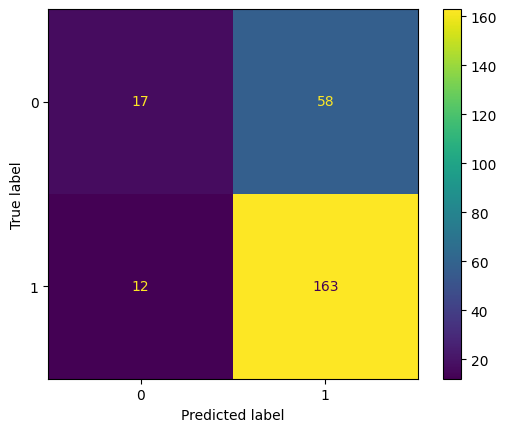

In [41]:
ConfusionMatrixDisplay.from_estimator( model_logreg, x_test_new, y_test)

## Decission Tree

In [42]:
model_dt.fit(x_train_new,y_train)

DecisionTreeClassifier(random_state=66)

In [43]:
y_train_predict_dt = model_dt.predict(x_train_new)
y_test_predict_dt = model_dt.predict(x_test_new)


In [44]:
print('------Clasification Report Decission Tree Train-------')
print(classification_report(y_train,y_train_predict_dt))

print('')
print('------Clasification Report Decission Tree Test-------')
print(classification_report(y_test,y_test_predict_dt))


------Clasification Report Decission Tree Train-------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       525

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750


------Clasification Report Decission Tree Test-------
              precision    recall  f1-score   support

           0       0.46      0.41      0.43        75
           1       0.76      0.79      0.77       175

    accuracy                           0.68       250
   macro avg       0.61      0.60      0.60       250
weighted avg       0.67      0.68      0.67       250



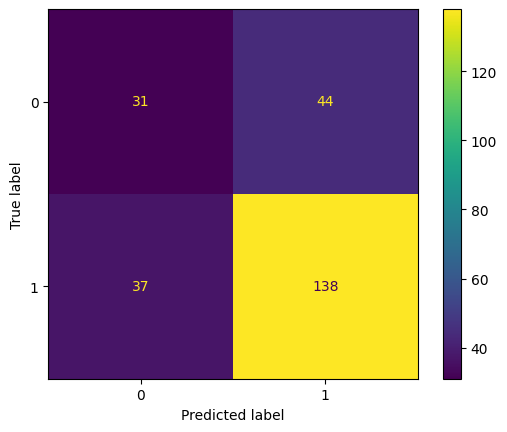

In [45]:
ConfusionMatrixDisplay.from_estimator( model_dt, x_test_new, y_test)

## Random Forest

In [46]:
model_rf.fit(x_train_new,y_train)

RandomForestClassifier(random_state=66)

In [47]:
y_train_predict_rf = model_rf.predict(x_train_new)
y_test_predict_rf = model_rf.predict(x_test_new)


In [48]:
print('------Clasification Report Random Forest Train-------')
print(classification_report(y_train,y_train_predict_rf))

print('')
print('------Clasification Report Random Forest Test-------')
print(classification_report(y_test,y_test_predict_rf))


------Clasification Report Random Forest Train-------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       525

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750


------Clasification Report Random Forest Test-------
              precision    recall  f1-score   support

           0       0.68      0.36      0.47        75
           1       0.77      0.93      0.84       175

    accuracy                           0.76       250
   macro avg       0.72      0.64      0.66       250
weighted avg       0.74      0.76      0.73       250



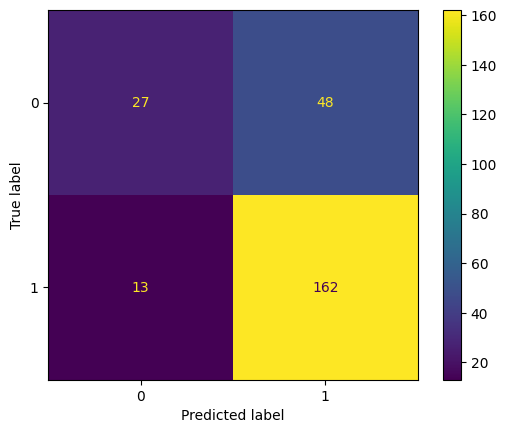

In [49]:
ConfusionMatrixDisplay.from_estimator( model_rf, x_test_new, y_test)

## KNN

In [50]:
x_train_new_knn = np.ascontiguousarray(x_train_new)
x_test_new_knn = np.ascontiguousarray(x_test_new)

In [51]:
model_knn.fit(x_train_new_knn,y_train)

KNeighborsClassifier()

In [52]:
y_train_predict_knn = model_knn.predict(x_train_new_knn)
y_test_predict_knn = model_knn.predict(x_test_new_knn)


In [53]:
print('------Clasification KNN Train-------')
print(classification_report(y_train,y_train_predict_knn))

print('')
print('------Clasification KNN Test-------')
print(classification_report(y_test,y_test_predict_knn))


------Clasification KNN Train-------
              precision    recall  f1-score   support

           0       0.70      0.50      0.58       225
           1       0.81      0.91      0.86       525

    accuracy                           0.79       750
   macro avg       0.75      0.70      0.72       750
weighted avg       0.78      0.79      0.77       750


------Clasification KNN Test-------
              precision    recall  f1-score   support

           0       0.67      0.39      0.49        75
           1       0.78      0.92      0.84       175

    accuracy                           0.76       250
   macro avg       0.73      0.65      0.67       250
weighted avg       0.75      0.76      0.74       250



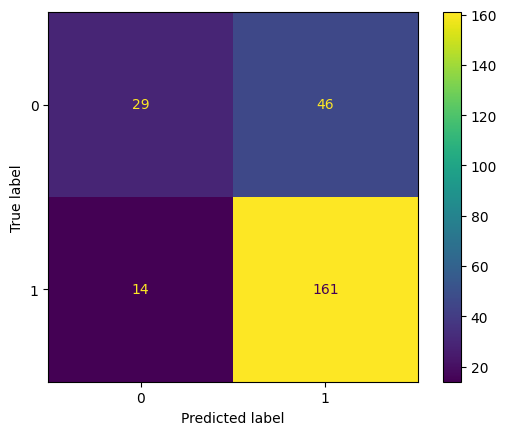

In [54]:
ConfusionMatrixDisplay.from_estimator( model_knn, x_test_new_knn, y_test)

## Naive Bayes

In [55]:
model_nb.fit(x_train_new,y_train)

GaussianNB()

In [56]:
y_train_predict_nb = model_nb.predict(x_train_new)
y_test_predict_nb = model_nb.predict(x_test_new)


In [57]:
print('------Clasification Naive Bayes Train-------')
print(classification_report(y_train,y_train_predict_nb))

print('')
print('------Clasification Naive Bayes Test-------')
print(classification_report(y_test,y_test_predict_nb))


------Clasification Naive Bayes Train-------
              precision    recall  f1-score   support

           0       0.50      0.63      0.56       225
           1       0.82      0.73      0.77       525

    accuracy                           0.70       750
   macro avg       0.66      0.68      0.66       750
weighted avg       0.72      0.70      0.71       750


------Clasification Naive Bayes Test-------
              precision    recall  f1-score   support

           0       0.49      0.48      0.48        75
           1       0.78      0.78      0.78       175

    accuracy                           0.69       250
   macro avg       0.63      0.63      0.63       250
weighted avg       0.69      0.69      0.69       250



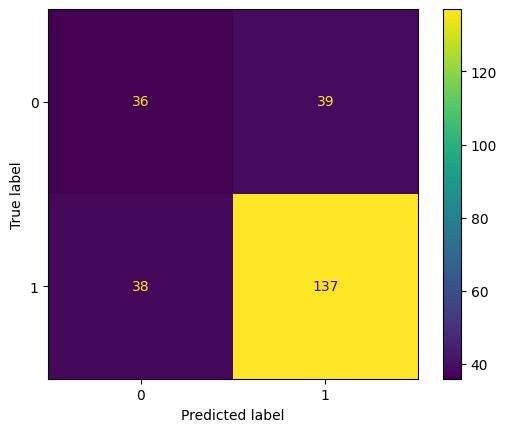

In [58]:
ConfusionMatrixDisplay.from_estimator( model_nb, x_test_new, y_test)

## GradientBoostingClassifier

In [59]:
model_gbc.fit(x_train_new,y_train)

GradientBoostingClassifier(random_state=66)

In [60]:
y_train_predict_gbc = model_gbc.predict(x_train_new)
y_test_predict_gbc = model_gbc.predict(x_test_new)


In [61]:
print('------Clasification GradientBoostingClassifier Train-------')
print(classification_report(y_train,y_train_predict_gbc))

print('')
print('------Clasification GradientBoostingClassifier Test-------')
print(classification_report(y_test,y_test_predict_gbc))


------Clasification GradientBoostingClassifier Train-------
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       225
           1       0.90      0.98      0.94       525

    accuracy                           0.91       750
   macro avg       0.92      0.86      0.88       750
weighted avg       0.91      0.91      0.90       750


------Clasification GradientBoostingClassifier Test-------
              precision    recall  f1-score   support

           0       0.68      0.45      0.54        75
           1       0.80      0.91      0.85       175

    accuracy                           0.77       250
   macro avg       0.74      0.68      0.70       250
weighted avg       0.76      0.77      0.76       250



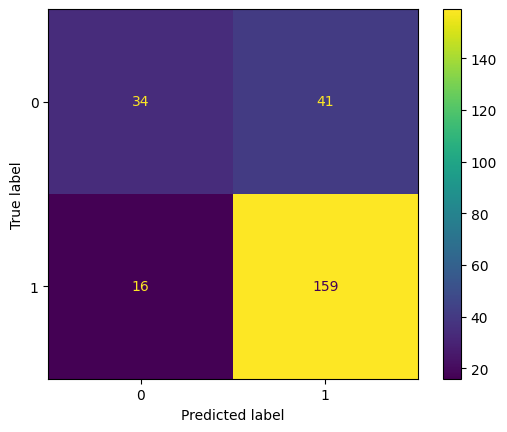

In [62]:
ConfusionMatrixDisplay.from_estimator( model_gbc, x_test_new, y_test)

## SVC

In [63]:
model_svc.fit(x_train_new,y_train)

SVC(random_state=66)

In [64]:
y_train_predict_svc = model_svc.predict(x_train_new)
y_test_predict_svc = model_svc.predict(x_test_new)


In [65]:
print('------Clasification SVC Train-------')
print(classification_report(y_train,y_train_predict_svc))

print('')
print('------Clasification SVC Test-------')
print(classification_report(y_test,y_test_predict_svc))


------Clasification SVC Train-------
              precision    recall  f1-score   support

           0       0.82      0.38      0.52       225
           1       0.78      0.96      0.86       525

    accuracy                           0.79       750
   macro avg       0.80      0.67      0.69       750
weighted avg       0.79      0.79      0.76       750


------Clasification SVC Test-------
              precision    recall  f1-score   support

           0       0.73      0.21      0.33        75
           1       0.74      0.97      0.84       175

    accuracy                           0.74       250
   macro avg       0.73      0.59      0.58       250
weighted avg       0.74      0.74      0.69       250



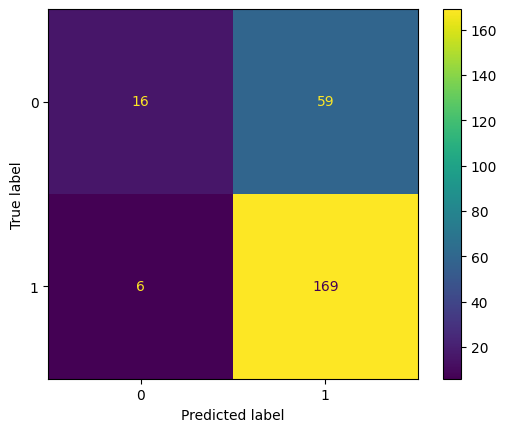

In [66]:
ConfusionMatrixDisplay.from_estimator( model_svc, x_test_new, y_test)

# Cross Validation 

In [67]:
def cross_val (model):

    precision_train_cross_val = cross_val_score(model,
                                        x_train_new,
                                        y_train,
                                        cv=5,
                                        scoring="precision")

    print('----Cross Validation',model,'---- ')
    print('precision Score - All - Cross Validation  : ', precision_train_cross_val)
    print('precision Score - Mean - Cross Validation : ', precision_train_cross_val.mean())
    print('precision Score - Std - Cross Validation  : ', precision_train_cross_val.std())
    print('precision Score - Range of Test-Set       : ', (precision_train_cross_val.mean()-precision_train_cross_val.std()) , '-', (precision_train_cross_val.mean()+precision_train_cross_val.std()))

In [68]:
cross_val(model_logreg)

----Cross Validation LogisticRegression(random_state=66) ---- 
precision Score - All - Cross Validation  :  [0.73846154 0.8034188  0.75       0.7421875  0.75609756]
precision Score - Mean - Cross Validation :  0.7580330805711902
precision Score - Std - Cross Validation  :  0.02350433212051099
precision Score - Range of Test-Set       :  0.7345287484506793 - 0.7815374126917012


In [69]:
cross_val(model_dt)

----Cross Validation DecisionTreeClassifier(random_state=66) ---- 
precision Score - All - Cross Validation  :  [0.86813187 0.75961538 0.75531915 0.76699029 0.74747475]
precision Score - Mean - Cross Validation :  0.7795062880840613
precision Score - Std - Cross Validation  :  0.04476120854048167
precision Score - Range of Test-Set       :  0.7347450795435796 - 0.824267496624543


In [70]:
cross_val(model_rf)

----Cross Validation RandomForestClassifier(random_state=66) ---- 
precision Score - All - Cross Validation  :  [0.76335878 0.8034188  0.75423729 0.73643411 0.75206612]
precision Score - Mean - Cross Validation :  0.7619030188819924
precision Score - Std - Cross Validation  :  0.022493879562416042
precision Score - Range of Test-Set       :  0.7394091393195764 - 0.7843968984444084


In [71]:
cross_val(model_nb)

----Cross Validation GaussianNB() ---- 
precision Score - All - Cross Validation  :  [0.77       0.85057471 0.82352941 0.79787234 0.78409091]
precision Score - Mean - Cross Validation :  0.8052134747849651
precision Score - Std - Cross Validation  :  0.02875120619777511
precision Score - Range of Test-Set       :  0.7764622685871899 - 0.8339646809827402


In [72]:
cross_val(model_gbc)

----Cross Validation GradientBoostingClassifier(random_state=66) ---- 
precision Score - All - Cross Validation  :  [0.79310345 0.81651376 0.78899083 0.7804878  0.76271186]
precision Score - Mean - Cross Validation :  0.7883615409433308
precision Score - Std - Cross Validation  :  0.017523303518224596
precision Score - Range of Test-Set       :  0.7708382374251062 - 0.8058848444615554


In [73]:
cross_val(model_svc)

----Cross Validation SVC(random_state=66) ---- 
precision Score - All - Cross Validation  :  [0.72661871 0.73758865 0.73228346 0.74814815 0.75      ]
precision Score - Mean - Cross Validation :  0.7389277940466636
precision Score - Std - Cross Validation  :  0.009000697318183336
precision Score - Range of Test-Set       :  0.7299270967284803 - 0.747928491364847


In [74]:
# khusus knn 
precision_train_cross_val_knn = cross_val_score(model_knn,
                                        x_train_new_knn,
                                        y_train,
                                        cv=5,
                                        scoring="precision")

print('----Cross Validation KNN ---- ')
print('precision Score - All - Cross Validation  : ', precision_train_cross_val_knn)
print('precision Score - Mean - Cross Validation : ', precision_train_cross_val_knn.mean())
print('precision Score - Std - Cross Validation  : ', precision_train_cross_val_knn.std())
print('precision Score - Range of Test-Set       : ', (precision_train_cross_val_knn.mean()-precision_train_cross_val_knn.std()) , '-', (precision_train_cross_val_knn.mean()+precision_train_cross_val_knn.std()))

----Cross Validation KNN ---- 
precision Score - All - Cross Validation  :  [0.73170732 0.77868852 0.74774775 0.74789916 0.73275862]
precision Score - Mean - Cross Validation :  0.7477602739529206
precision Score - Std - Cross Validation  :  0.016966573954932767
precision Score - Range of Test-Set       :  0.7307936999979878 - 0.7647268479078533


Based on cross-validation, the best model for this case is Naive Bayes. This is because the mean precision value in this test for Naive Bayes is the largest compared to other models. And also, the standard deviation of this model is the smallest compared to other models.

# Hyperparameter Tuning 

In [75]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]],
    
}

In [76]:
grid_search = GridSearchCV(estimator=model_nb, param_grid=param_grid, cv=5, scoring='precision')
grid_search.fit(x_train_new, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='precision')

In [77]:
print("Best Parameter:", grid_search.best_params_)
print("Precision:", grid_search.best_score_)

Best Parameter: {'priors': [0.8, 0.2], 'var_smoothing': 1e-05}
Precision: 0.8502270929637238


In [78]:
model_nb_best = grid_search.best_estimator_

In [79]:
y_train_predict_nb_best = model_nb_best.predict(x_train_new)
y_test_predict_nb_best = model_nb_best.predict(x_test_new)


In [80]:
print('------Clasification Report Naive Bayes Best Train-------')
print(classification_report(y_train,y_train_predict_nb_best))

print('')
print('------Clasification Report Naive Bayes Best Test-------')
print(classification_report(y_test,y_test_predict_nb_best))


------Clasification Report Naive Bayes Best Train-------
              precision    recall  f1-score   support

           0       0.46      0.83      0.59       225
           1       0.89      0.58      0.70       525

    accuracy                           0.65       750
   macro avg       0.67      0.70      0.64       750
weighted avg       0.76      0.65      0.67       750


------Clasification Report Naive Bayes Best Test-------
              precision    recall  f1-score   support

           0       0.42      0.67      0.52        75
           1       0.81      0.61      0.69       175

    accuracy                           0.62       250
   macro avg       0.61      0.64      0.60       250
weighted avg       0.69      0.62      0.64       250



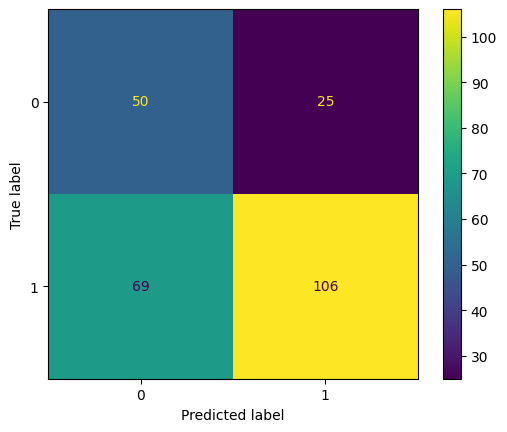

In [81]:
ConfusionMatrixDisplay.from_estimator( model_nb_best, x_test_new, y_test)

In [82]:
all_reports_nb = {}
def performance_report(all_reports_nb, y_train, y_train_predict_nb, y_test, y_test_predict_nb, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_train_predict_nb),
      'train - recall' : recall_score(y_train, y_train_predict_nb),
      'train - accuracy' : accuracy_score(y_train, y_train_predict_nb),
      'train - f1_score' : f1_score(y_train, y_train_predict_nb),
      'test - precision' : precision_score(y_test, y_test_predict_nb),
      'test - recall' : recall_score(y_test, y_test_predict_nb),
      'test - accuracy_score' : accuracy_score(y_test, y_test_predict_nb),
      'test - f1_score' : f1_score(y_test, y_test_predict_nb),
  }
  all_reports_nb[name] = score_reports
  return all_reports_nb

all_reports_nb = performance_report(all_reports_nb, y_train, y_train_predict_nb, y_test, y_test_predict_nb, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports_nb)

all_reports_nb = performance_report(all_reports_nb, y_train, y_train_predict_nb_best, y_test, y_test_predict_nb_best, 'After HyperParameter Tuning')
pd.DataFrame(all_reports_nb)

,Baseline (Default Hyperparameter),After HyperParameter Tuning
train - precision,0.821121,0.886297
train - recall,0.725714,0.579048
train - accuracy,0.697333,0.653333
train - f1_score,0.770475,0.700461
test - precision,0.778409,0.809160
test - recall,0.782857,0.605714
test - accuracy_score,0.692000,0.624000
test - f1_score,0.780627,0.692810


After hyperparameter tuning, the results showed that the Naive Bayes model after hyperparameter tuning was better than the Naive Bayes base model. The precision value obtained is 81%. The parameters of this model are:
- 'priors': [0.8, 0.2], 
- 'var_smoothing': 1e-05

# Pipeline Total

In [83]:
final_total = imbpipe([
    ('preprocess',prep),
    ('naive_bayes', model_nb_best)
])

final_total


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Capping',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['age',
                                                                                         'duration',
                                                                                         'credit_amount'])),
                                                                  ('Scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'duration',
                                                   'credit_amount']),
                                                 ('cat_ordinal',
                                                  Pipeline(steps=[('Encoder',
                                                                   OrdinalEncoder(categories=[['no '
                                                                                               'checking',
                                                                                               '<0',...
                                                  ['checking_status',
                                                   'savings_status',
                                                   'employment']),
                                                 ('cat_non_ordinal',
                                                  Pipeline(steps=[('Encoder',
                                                                   OneHotEncoder(sparse=False,
                                                                                 sparse_output=False))]),
                                                  ['credit_history', 'purpose',
                                                   'personal_status',
                                                   'other_parties',
                                                   'property_magnitude',
                                                   'other_payment_plans',
                                                   'housing',
                                                   'foreign_worker'])])),
                ('naive_bayes',
                 GaussianNB(priors=[0.8, 0.2], var_smoothing=1e-05))])

# Model Saving 

In [84]:
with open('pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_total, file_1)




In [85]:
df_ready.columns

Index(['age', 'duration', 'credit_amount', 'checking_status', 'credit_history',
       'purpose', 'savings_status', 'employment', 'personal_status',
       'other_parties', 'property_magnitude', 'other_payment_plans', 'housing',
       'foreign_worker', 'class'],
      dtype='object')

# Conclusion 

1. In this case, the features that will be used are : 
- 'age'
- 'duration'
- 'credit_amount'
- 'checking_status'
- 'credit_history'
- 'purpose'
- 'savings_status'
- 'employment'
- 'personal_status'
- 'other_parties'
- 'property_magnitude'
- 'other_payment_plans'
- 'housing'
- 'foreign_worker'

2. The pipe line will contain:
- Preprocessing : Capping, Scalling, Encoding 
- Model : Naive Bayes

3. The Naive Bayes model used has a precision value of 81% with the following parameters::
- 'priors': [0.8, 0.2], 
- 'var_smoothing': 1e-05